In [14]:
from netCDF4 import Dataset
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data, axis=0)
    return y

In [42]:
inpath = '/home/aes/git/pristine/MOM6-examples/ice_ocean_SIS2/OM4_05/INPUT/u_10_mod.clim.nc'
ncfile = Dataset(inpath).variables

In [43]:
fs = 1./(ncfile['TIME'][1] - ncfile['TIME'][0])
u = ncfile['U_10'][:,:,:]

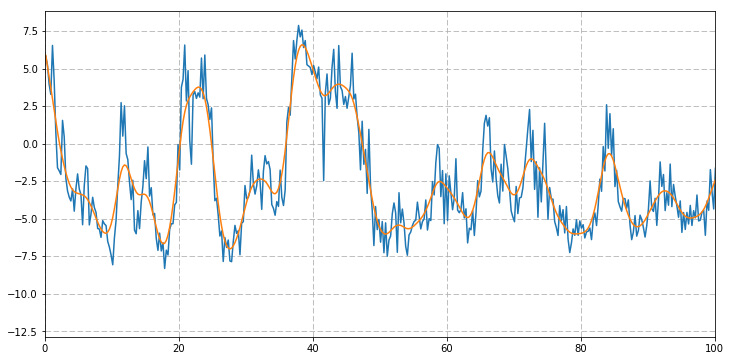

In [45]:
filt_u = butter_lowpass_filter(u, 1/5., fs, order = 2)

t = ncfile['TIME'][:]
plt.figure(figsize=(12,6))
plt.plot(t,u[:,40,100])
plt.plot(t,filt_u[:,40,100])
plt.xlim((0,100))
plt.grid(ls='--')

In [38]:
fs, Pxx = signal.welch()

TypeError: welch() missing 1 required positional argument: 'x'

In [40]:
signal.filtfilt?

In [48]:
for a in ncfile:
    print(a)

LAT
LON
TIME
U_10
U_10_MOD
